model deployment for diabetes.csv

In [ ]:
#import the required libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler

#load dataset
df = pd.read_csv('diabetes.csv')

X = df.drop('Outcome' , axis=1)
y = df['Outcome']

# preprocessing
scalar =StandardScaler()
X_scaled = scalar.fit_transform(X)

#model training
X_train , X_test , y_train , y_test = train_test_split(X_scaled , y , test_size=0.2 , random_state=42)

model = RandomForestClassifier()
model.fit(X_scaled , y)

# save model & scalar
joblib.dump(model , "diabetes.pkl")
joblib.dump(scalar , "diabetes_scalar.pkl")

['diabetes_scalar.pkl']

In [ ]:
# step1 : train a classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

#load & preprocessing

df = pd.read_csv('diabetes.csv')

X = df.drop('Outcome' , axis=1)
y = df['Outcome']

#train and split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

#scale feature

scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)

#train model

model = RandomForestClassifier()
model.fit(X_train_scaled , y_train)

RandomForestClassifier()

In [ ]:
#step2 : export the model

#option 1 : using pickle

import pickle as pkl

#save the model 

with open("diabetes.pkl" , "wb") as f:
    pkl.dump(model , f)

#save scalar too (important for deployment)

with open("diabetes_scalar.pkl" , "wb") as f:
    pkl.dump(scalar , f)

#option 2 : using joblib

import joblib

#save model

joblib.dump(model , "diabetes_model_joblib.pkl")

#save scalar

joblib.dump(scalar , "diabetes_scalar_joblib.pkl")

['diabetes_scalar_joblib.pkl']

In [ ]:
#step 3 : load the saved model
#using pickle

import pickle as pkl 

with open("diabetes.pkl" , "rb") as f:
    loaded_data = pkl.load(f)

#using joblib

import joblib

loaded_data = joblib.load("diabetes_model_joblib.pkl")

#predict with loaded model

X_test_scaled = scalar.transform(X_test)
prediction = loaded_data.predict(X_test)

c:\Users\annsl\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
# ML pipeline steps

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

df = pd.read_csv('diabetes.csv')

X = df.drop('Outcome' , axis=1)
y = df['Outcome']

X_train , X_test , y_train , y_test = train_test_split(X, y , test_size=0.2 , random_state=42)

scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
#X_test_scaled = scalar.transform(X_test)

model = RandomForestClassifier(n_estimators=5 , random_state=42)
model.fit(X_train , y_train)

RandomForestClassifier(n_estimators=5, random_state=42)

In [28]:
from sklearn.metrics import confusion_matrix , classification_report , roc_auc_score

y_pred = model.predict(X_test_scaled)
y_pred_prob = model.predict_proba(X_test_scaled)[: , 1]

print("Confusion matrix : " ,confusion_matrix(y_test , y_pred) )
print("Classification report : " ,classification_report(y_test , y_pred) )
print("ROC AUC  : " ,roc_auc_score(y_test , y_pred_prob) )

Confusion matrix :  [[99  0]
 [55  0]]
Classification report :                precision    recall  f1-score   support

           0       0.64      1.00      0.78        99
           1       0.00      0.00      0.00        55

    accuracy                           0.64       154
   macro avg       0.32      0.50      0.39       154
weighted avg       0.41      0.64      0.50       154

ROC AUC  :  0.6292929292929292


c:\Users\annsl\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\annsl\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\annsl\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\annsl\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicte

In [29]:
import joblib

joblib.dump(model , "diabetes_model_joblib.pkl")
joblib.dump(scalar , "diabetes_scalar_joblib.pkl")

['diabetes_scalar_joblib.pkl']

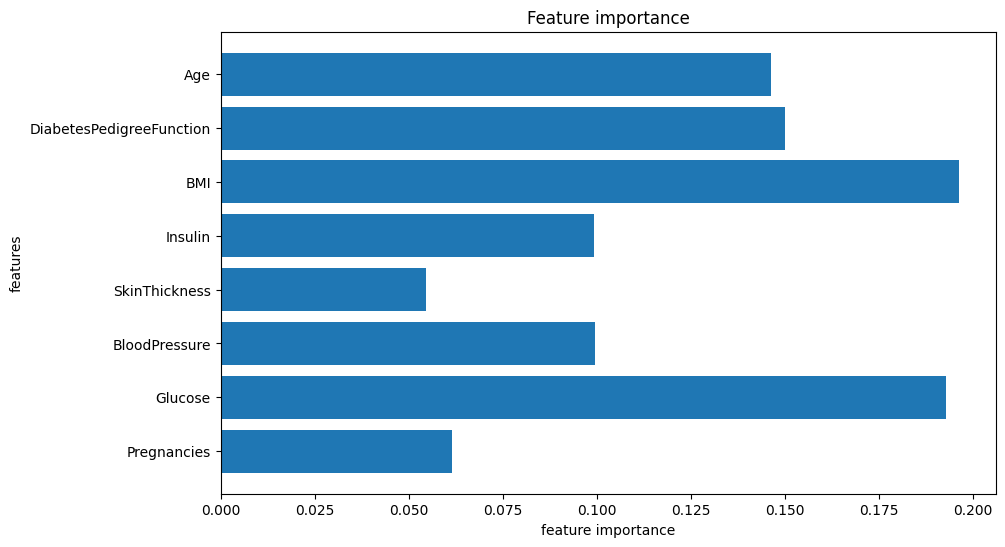

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('diabetes.csv')

feature = df.drop('Outcome' , axis=1).columns
importances = model.feature_importances_
plt.figure(figsize=(10,6))
plt.barh(feature , importances)
plt.title("Feature importance")
plt.xlabel("feature importance")
plt.ylabel("features")
plt.show()